#Домашнее задание № 12

#Feature Selection

#1. Генерация данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_classification

# зафиксируем случайное значение
x_data_generated, y_data_generated = make_classification(scale=1,
                                                         random_state=13
                                                        )

In [166]:
# посмотрим, что мы имеем
x_data_generated

array([[-0.75619018,  0.21395857, -0.82867609, ...,  0.53451903,
         1.71244753, -0.96185641],
       [ 1.73869086, -0.16574873, -1.05609496, ...,  0.64513215,
         0.13010028, -0.95982956],
       [ 0.48382884, -0.19163168,  1.57107624, ...,  1.33913158,
         1.27512584, -1.31453582],
       ...,
       [ 0.66950843, -1.51960178, -1.30826663, ..., -0.27674249,
         0.98981126,  2.87143611],
       [ 0.55146917, -1.08810532, -0.17640169, ..., -0.18344132,
        -1.02655964,  1.31005256],
       [ 0.45043866, -0.14014651, -1.8189506 , ..., -1.27436948,
        -0.03835527,  0.64253573]])

In [4]:
x_data_generated.shape

(100, 20)

In [5]:
y_data_generated

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [6]:
y_data_generated.shape

(100,)

#2. Построим модель логистической регрессии и оценим среднюю точность.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [430]:
# наша базовая функция для оценки средней точности
def report(X, y):

  report = cross_val_score(LogisticRegression(),
                           X, y,
                           scoring='accuracy'
                          ).mean()

  return report

In [435]:
# получим среднюю точность
y_ = report(x_data_generated, y_data_generated)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.89


In [436]:
# запомним данные
x_report = []
y_report = []

x_report.append('df_by_default')
y_report.append(y_)

#3. Используем статистические методы для отбора признаков

а) Признаки на основе матрицы корреляции

объединю все данные в уже привычный мне df

In [9]:
X = pd.DataFrame(x_data_generated)
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.756190,0.213959,-0.828676,-1.528017,-2.104497,0.632824,0.301350,-0.882576,-0.306198,2.465294,-1.656867,0.312963,-1.052908,-1.235778,1.855338,-0.814566,-0.766852,0.534519,1.712448,-0.961856
1,1.738691,-0.165749,-1.056095,-0.137139,-0.654046,0.348853,1.963982,0.833162,1.740636,-1.082962,-1.803864,0.963135,2.556159,-1.316542,2.109290,-0.516526,-0.666496,0.645132,0.130100,-0.959830


In [10]:
X.shape

(100, 20)

In [12]:
y = pd.DataFrame(y_data_generated)
# переименую колонку
y.columns = ['target']
y.head(2)

,target
0,0
1,0


In [13]:
y.shape

(100, 1)

объединю все это в уже привычный мне df

In [14]:
df = pd.concat([X, y], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.756190,0.213959,-0.828676,-1.528017,-2.104497,0.632824,0.301350,-0.882576,-0.306198,2.465294,...,0.312963,-1.052908,-1.235778,1.855338,-0.814566,-0.766852,0.534519,1.712448,-0.961856,0
1,1.738691,-0.165749,-1.056095,-0.137139,-0.654046,0.348853,1.963982,0.833162,1.740636,-1.082962,...,0.963135,2.556159,-1.316542,2.109290,-0.516526,-0.666496,0.645132,0.130100,-0.959830,0
2,0.483829,-0.191632,1.571076,-0.579508,1.436571,-1.074081,1.762714,-0.159563,0.148698,0.531977,...,-0.005137,-1.370364,1.446023,-0.506516,-0.162401,0.460995,1.339132,1.275126,-1.314536,0
3,1.849776,0.861722,0.365227,0.247661,0.135947,-0.394436,1.336323,-0.199560,0.305607,0.506357,...,-1.649669,0.016462,0.397888,-0.953691,2.503354,-0.570866,0.838073,-0.393036,0.565642,1
4,1.377108,-0.893788,1.351264,1.393747,0.148176,0.380857,-0.407761,1.476685,-0.562467,-1.800564,...,0.266751,-0.909360,-1.175715,-0.204859,0.167022,-0.897399,0.467582,-1.022961,-1.371149,0


In [15]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.120154,-0.070671,-0.151188,0.050882,-0.099074,0.045434,-0.127756,-0.045589,0.111655,0.159472,...,-0.187765,-0.090220,-0.067377,0.058351,0.027844,0.033459,0.014890,0.008333,0.116487,0.500000
std,1.029317,0.911840,1.456324,1.078019,1.043696,1.003933,1.005874,0.960435,0.967857,1.071742,...,1.098562,1.010577,1.089025,1.363337,0.956492,0.893046,0.943346,0.906037,1.221699,0.502519
min,-2.693956,-2.013360,-3.118845,-2.364696,-2.339171,-2.372102,-2.933029,-3.425661,-2.936142,-2.161504,...,-3.210431,-2.280460,-2.271028,-3.020651,-2.326926,-2.005372,-2.143352,-2.611967,-2.468890,0.000000
25%,-0.574127,-0.768745,-1.363612,-0.722966,-0.862129,-0.550086,-0.760237,-0.693479,-0.466552,-0.600106,...,-0.868576,-0.784365,-0.763796,-1.061636,-0.600467,-0.737069,-0.634921,-0.556520,-0.873622,0.000000
50%,0.093188,-0.114121,-0.304949,0.089421,0.000269,0.029177,-0.118067,-0.064457,0.098600,0.263356,...,-0.186091,-0.117174,-0.036870,0.013646,-0.009906,0.167441,0.132346,0.111514,0.217838,0.500000
75%,0.778757,0.678780,1.385680,0.696511,0.544603,0.587440,0.320379,0.602749,0.668443,1.014225,...,0.484135,0.654867,0.589404,1.216847,0.770117,0.575757,0.615234,0.650613,1.002116,1.000000
max,2.243329,2.098503,2.007150,2.966250,2.641301,2.514027,2.592084,2.489708,2.438510,2.465294,...,2.533515,2.556159,2.846799,3.266116,2.503354,3.101864,2.305784,2.279506,3.107413,1.000000


Разброс данных не большой. Принимаю решение не делать нормализацию.

#3. Используем статистические методы для отбора признаков

a) Выбор признаков на основе матрицы корреляции

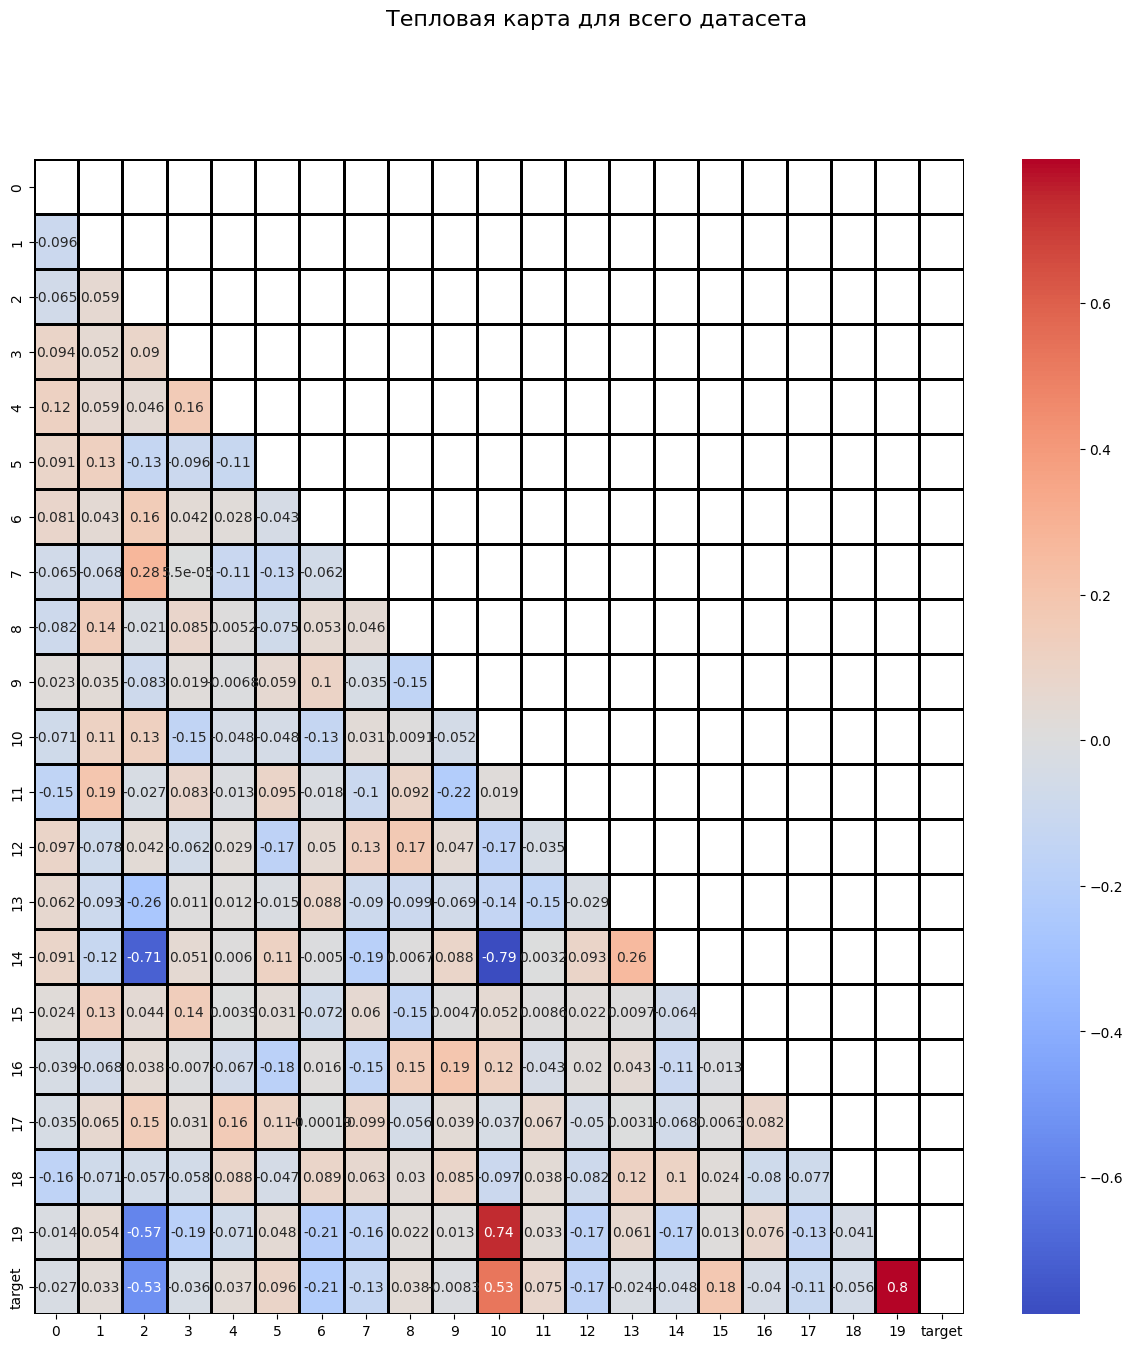

In [16]:
matrix = np.triu(df.corr())     # для построение карты треугольной форма

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),          # построение корреляции
            annot=True,         # нахождение коэффициенто корреляции
            fmt='.2g',          # не более 2-х знаков после запятой
            cmap='coolwarm',    # настройка цвета
            linewidths=1,       # толщина линий
            linecolor='black',  # цвет линий
            mask=matrix         # треуголиник основанием вниз
            )

plt.suptitle('Тепловая карта для всего датасета', fontsize=16)
plt.show()

Много всего интересного, но оставим только то, что влият на целевую переменную

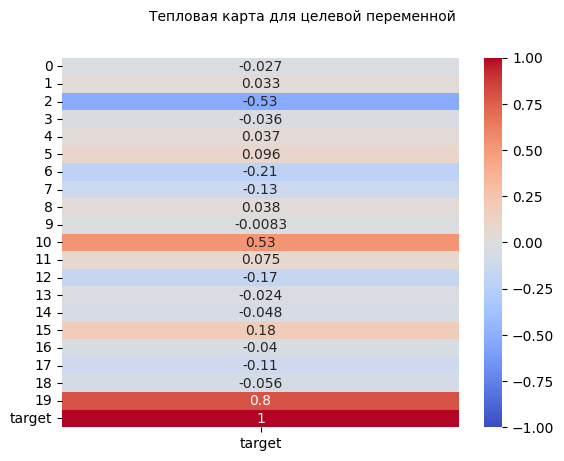

In [17]:
sns.heatmap(df.corr()[['target']], vmin=-1, vmax=+1, annot=True, cmap='coolwarm')
plt.suptitle('Тепловая карта для целевой переменной', fontsize=10)
plt.show()

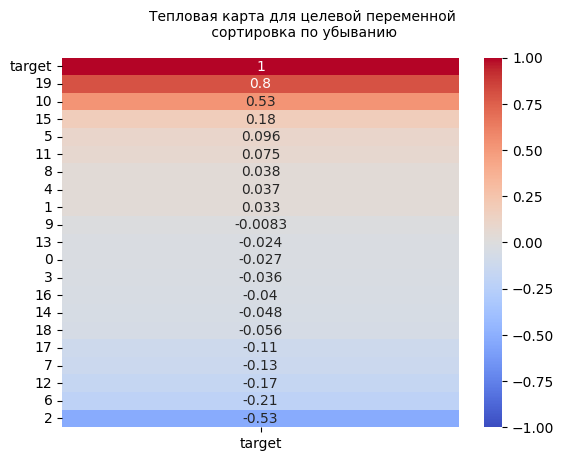

In [18]:
# отсортируем по убыванию
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False),
            vmin=-1,
            vmax=+1,
            annot=True,
            cmap='coolwarm'
           )
plt.suptitle('Тепловая карта для целевой переменной\n сортировка по убыванию', fontsize=10)
plt.show()

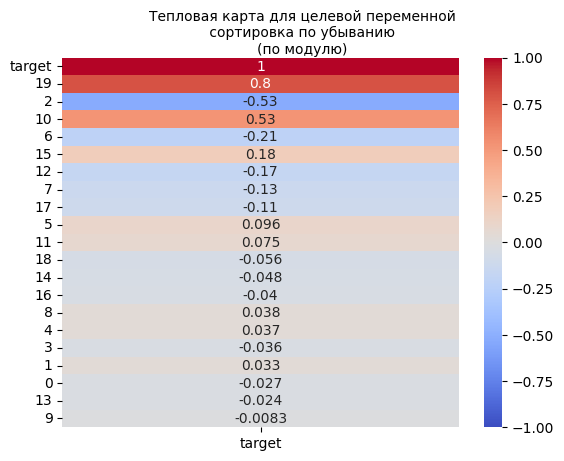

In [19]:
# а так же учтем, что отрицательные значения так же влияют на целевую переменную
# просто с другим знаком
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False, key=abs),
            vmin=-1,
            vmax=+1,
            annot=True,
            cmap='coolwarm'
           )
plt.suptitle('Тепловая карта для целевой переменной\n сортировка по убыванию \n(по модулю)', fontsize=10)
plt.show()


In [20]:
# получим коэффициенты корреляции
corr_coefficients = df.corr()[['target']].sort_values(by='target', ascending=False, key=abs)
corr_coefficients.drop(corr_coefficients[:1], inplace=True)
corr_coefficients.head()

,target
19,0.797648
2,-0.530812
10,0.530674
6,-0.214896
15,0.179651


In [21]:
# получим список значений
corr_list = corr_coefficients.index.to_list()
corr_list

[19, 2, 10, 6, 15, 12, 7, 17, 5, 11, 18, 14, 16, 8, 4, 3, 1, 0, 13, 9]

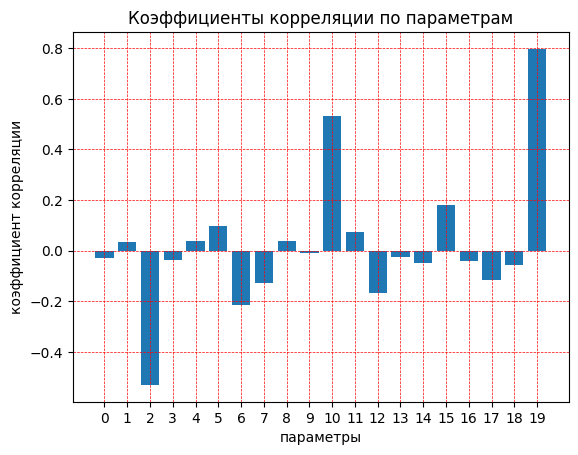

In [22]:
# коэффициенты корреляции тоже визуализируем
plt.bar(corr_list, corr_coefficients['target'].to_list())
plt.xticks(np.arange(min(corr_list), max(corr_list)+1, 1.0))
plt.title('Коэффициенты корреляции по параметрам')
plt.xlabel('параметры')
plt.ylabel('коэффициент корреляции')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)
plt.show()

In [23]:
# зададим порог отсечения
cut_off = 0.3

# оставим только переменные коэффициент корреляции для которых >= cut_off
corr_coefficients = corr_coefficients.loc[abs(corr_coefficients['target']) >= cut_off]
corr_coefficients

,target
19,0.797648
2,-0.530812
10,0.530674


In [24]:
# сохраним найденные переменные
corr_list = corr_coefficients.index.to_list()
corr_list

[19, 2, 10]

In [25]:
# сохраним df_corr с найденными максимальными значениями параметров
df_corr = df[corr_list]
df_corr.insert(len(df_corr.columns), 'target', df['target'], True)
df_corr.head(2)

,19,2,10,target
0,-0.961856,-0.828676,-1.656867,0
1,-0.959830,-1.056095,-1.803864,0


b) Отсечем низковариативные признаки (VarianceThreshold).

Функция выбирает только признаки, которые соответствуют определённому пороговому значению.

In [61]:
from sklearn.feature_selection import VarianceThreshold

In [167]:
# подготовим данные
X = x_data_generated
y = y_data_generated

In [168]:
# построим модель
# зададим пороговое значение
vt = VarianceThreshold(threshold=0.99)

In [211]:
# обучим модель
vt.fit(X, y=None)

VarianceThreshold(threshold=0.99)

In [212]:
# получим параметры, которые остались после проверки
vt_list = vt.get_support(indices=True)
vt_list

array([ 0,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 19])

In [213]:
# сохраним как df_vt
df_vt = df[vt_list].copy()
df_vt.insert(len(df_vt.columns), 'target', df['target'], True)
df_vt.head(2)

,0,2,3,4,5,6,9,10,11,12,13,14,19,target
0,-0.756190,-0.828676,-1.528017,-2.104497,0.632824,0.301350,2.465294,-1.656867,0.312963,-1.052908,-1.235778,1.855338,-0.961856,0
1,1.738691,-1.056095,-0.137139,-0.654046,0.348853,1.963982,-1.082962,-1.803864,0.963135,2.556159,-1.316542,2.109290,-0.959830,0


c) Построим модель логистической регрессии и оценим среднюю точность с учетом обработанных данных

Данные на основе корреляции признаков

In [214]:
# подготовим данные
X = df_corr.drop(['target'], axis=1).copy()
y = df_corr['target']

In [439]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.89


In [440]:
# запомним данные
x_report.append('Correlation')
y_report.append(y_)

Данные на основе отсечения низковариативных признаков (VarianceThreshold).

In [444]:
# подготовим данные
X = df_vt.drop(['target'], axis=1).copy()
у = df_vt['target']

In [445]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.88


In [446]:
# запомним данные
x_report.append('VarianceThreshold')
y_report.append(y_)

#4. Отбор признаков на основе дисперсионного анализа

a) Выбираем 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [449]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [450]:
skb = SelectKBest(score_func=f_classif,   # критерий для отбора признаков
                  k=5                     # из набора данных будут выбраны 5 лучши функций
                 )

In [451]:
# подготовим данные
X = x_data_generated
y = y_data_generated

In [452]:
# обучим модель
skb.fit(X, y)

SelectKBest(k=5)

In [453]:
# получим параметры, которые остались после проверки
skb_list = skb.get_support(indices=True)
skb_list

array([ 2,  6, 10, 15, 19])

In [454]:
# сохраним как df_skb
df_skb = df[skb_list].copy()
df_skb.insert(len(df_skb.columns), 'target', df['target'], True)
df_skb.head(2)

,2,6,10,15,19,target
0,-0.828676,0.301350,-1.656867,-0.814566,-0.961856,0
1,-1.056095,1.963982,-1.803864,-0.516526,-0.959830,0


b) Построим модель логистической регрессии и оценим среднюю точность с учетом обработанных данных

In [455]:
# подготовим данные
X = df_skb.drop(['target'], axis=1).copy()
у = df_skb['target']

In [457]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.89


In [458]:
# запомним данные
x_report.append('SelectKBest')
y_report.append(y_)

#5. Отбор с использованием моделей.

In [218]:
# подготовим данные
X = x_data_generated
y = y_data_generated

a) Отбор признаков с помощью логистической регрессии. Отобранные признаки подаем далее на вход в саму логистическую регрессию (SelectFromModel). Используем L1 регуляризацию.

In [231]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [237]:
# Создадим модель логистической регрессии
lr = LogisticRegression(random_state=42)

In [238]:
# попробуем найти оптимальное значение C
param_grid = [
              {'penalty' : ['l1'],                      # указывает на тип регуляции L1
               'C' : np.logspace(-10, 10, 20),          # величина регуляции. по умролчанию 1
               'solver' : ['liblinear'],                # алгоритм для нахождения параметров модели
               'max_iter' : [100, 1000, 2500, 5000]     # итерации
              }
             ]

model_lr = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [239]:
# обучим модель
# и найдем лучшее значение C
res_ = model_lr.fit(X, y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [243]:
# Получим нашу лучшую модель
best_lr = res_.best_estimator_
best_lr

LogisticRegression(C=3.359818286283774, penalty='l1', random_state=42,
                   solver='liblinear')

In [286]:
# судя по цвету она уже обучена

In [244]:
# Произведём отбор признаков с помощью уже обученной моделью
sfm_lr = SelectFromModel(estimator=best_lr, # уже обученная модель
                         threshold=0.6,     # порог важности
                                            # None-среднее значение важности функций
                         prefit=True,       # передаtv в SelectFromModel уже обученную модель
                        )

In [245]:
# обучим
sfm_lr.fit(X, y)
sfm_lr

SelectFromModel(estimator=LogisticRegression(C=3.359818286283774, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'),
                prefit=True, threshold=0.6)

In [247]:
# получим параметры, которые остались после проверки
sfm_lr_list = sfm_lr.get_support(indices=True)
sfm_lr_list

array([ 1,  2,  4, 11, 12, 15, 16, 17, 18, 19])

In [249]:
# сохраним как df_sfm_lr
df_sfm_lr = df[sfm_lr_list].copy()
df_sfm_lr.insert(len(df_sfm_lr.columns), 'target', df['target'], True)
df_sfm_lr.head(2)

,1,2,4,11,12,15,16,17,18,19,target
0,0.213959,-0.828676,-2.104497,0.312963,-1.052908,-0.814566,-0.766852,0.534519,1.712448,-0.961856,0
1,-0.165749,-1.056095,-0.654046,0.963135,2.556159,-0.516526,-0.666496,0.645132,0.130100,-0.959830,0


b) Отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
# построим модель
rfc = RandomForestClassifier(random_state=42)

In [291]:
# подготовим данные
X = df.drop({'target'}, axis=1)
y = df['target']

In [292]:
# поищем хорошие параметры
param_grid = {
              'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_leaf': [1, 2, 4, 10]
             }

In [293]:
# Создим экземпляр GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5)

In [294]:
# Запускаем поиск лучших параметров
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'n_estimators': [50, 100, 150]})

In [295]:
# наши лучшие параметры
best_params_rfc = grid_search.best_params_
best_params_rfc

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

In [346]:
# построим и обучим нашу лучшую модель
best_rfc = RandomForestClassifier(**best_params_rfc, random_state=42)
best_rfc.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

In [348]:
# получаем важные признаки
importances = best_rfc.feature_importances_
importances

array([0.01362245, 0.02011028, 0.10872249, 0.0133759 , 0.01253516,
       0.01111767, 0.02761468, 0.01243069, 0.01452273, 0.00914524,
       0.17833466, 0.02221931, 0.01482268, 0.02372778, 0.06092228,
       0.02339542, 0.00969164, 0.02815897, 0.01150297, 0.38402699])

In [360]:
# отберем только значения больше заданной величины
feature_names = X.columns
tmp_ = pd.DataFrame({'Importance': importances})
tmp_ = tmp_[tmp_['Importance'] >= 0.1]
tmp_

,Importance
2,0.108722
10,0.178335
19,0.384027


In [363]:
# получим параметры, которые остались после проверки
best_rfc_list = tmp_.index.to_list()
best_rfc_list

[2, 10, 19]

In [367]:
# сохраним как df_rfc
df_rfc = df[best_rfc_list].copy()
df_rfc.insert(len(best_rfc_list), 'target', df['target'], True)
df_rfc.head(2)

,2,10,19,target
0,-0.828676,-1.656867,-0.961856,0
1,-1.056095,-1.803864,-0.959830,0


c) Оценим точность

Данные на основе SelectFromModel

In [368]:
# подготовим данные
X = df_sfm_lr.drop(['target'], axis=1).copy()
у = df_sfm_lr['target']

In [462]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.89


In [463]:
# запомним данные
x_report.append('LogisticRegression+SelectFromModel')
y_report.append(y_)

Данные на основе RandomForest.

In [370]:
# подготовим данные
X = df_rfc.drop(['target'], axis=1).copy()
у = df_rfc['target']

In [466]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.89


In [467]:
# запомним данные
x_report.append('RandomForestClassifier')
y_report.append(y_)

#6. Перебор признаков

SequentialFeatureSelector - Трансформатор, который выполняет последовательный выбор функций.

In [401]:
# подготовим данные
X = df.drop(['target'], axis=1).copy()
у = df['target']

In [402]:
X.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.75619,0.213959,-0.828676,-1.528017,-2.104497,0.632824,0.30135,-0.882576,-0.306198,2.465294,-1.656867,0.312963,-1.052908,-1.235778,1.855338,-0.814566,-0.766852,0.534519,1.712448,-0.961856


In [375]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [383]:
# построим модель
knc = KNeighborsClassifier()

In [384]:
# попробуем поискать лучшие параметры
param_grid = {
              'n_neighbors': [3, 5, 7, 9, 11, 13],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]
             }

In [385]:
# построим модель
grid_search = GridSearchCV(estimator=knc,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=True
                          )

In [403]:
# обучим модель
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [404]:
# наши лучшие параметры
best_params_knc = grid_search.best_params_
best_params_knc

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [405]:
# построим и обучим нашу лучшую модель
best_knc = KNeighborsClassifier(**best_params_knc)
best_knc.fit(X, y)

KNeighborsClassifier(n_neighbors=11, p=1)

In [406]:
# построим модель
sfs = SequentialFeatureSelector(best_knc,
                                n_features_to_select=3
                               )

In [407]:
# обучим модель
sfs.fit(X, y)
sfs

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=11, p=1),
                          n_features_to_select=3)

In [415]:
# получим параметры, которые остались после проверки
sfm_list = sfs.get_support(indices=True)
sfm_list

array([ 2, 14, 19])

In [412]:
# получим маску
mask_sfs = sfs.get_support(indices=False)
mask_sfs

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True])

In [416]:
# сохраним как df_sfs
df_sfs = df[sfs_list].copy()
df_sfs.insert(len(df_sfs.columns), 'target', df['target'], True)
df_sfs.head(2)

,2,14,19,target
0,-0.828676,1.855338,-0.961856,0
1,-1.056095,2.109290,-0.959830,0


b) Получим искомую величину

In [420]:
# подготовим данные
X = df_sfs.drop(['target'], axis=1).copy()
у = df_sfs['target']

In [470]:
# получим среднюю точность
y_ = report(X, y)
print('средняя точность : {:.2f}'.format(y_))

средняя точность : 0.89


In [471]:
# запомним данные
x_report.append('SequentialFeatureSelector')
y_report.append(y_)

#8. Краткий отчет о проделанной работе

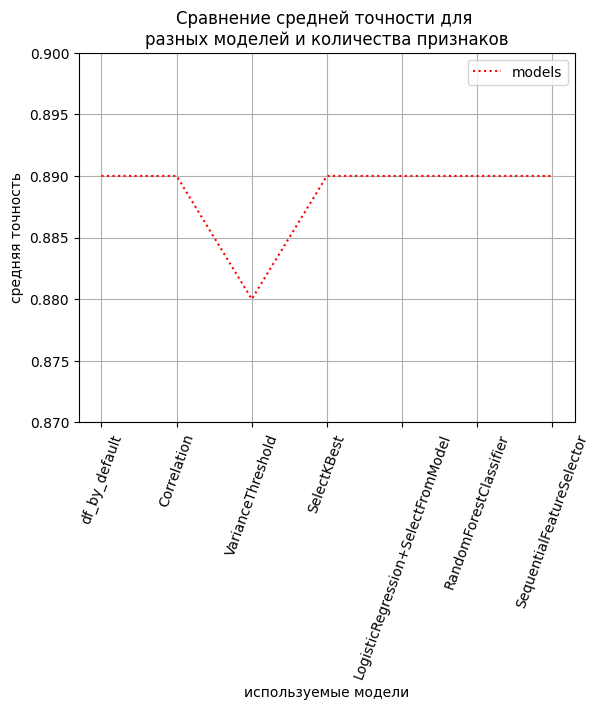

In [491]:
# визуализируем
plt.plot(x_report, y_report, color='r', label='models', linestyle='dotted')
plt.xticks(list(range(0, len(x_report), 1)))
plt.xlabel('используемые модели')
plt.xticks(rotation=70)
plt.ylabel('средняя точность')
plt.title('Сравнение средней точности для \nразных моделей и количества признаков')
plt.legend()
plt.ylim (0.87, 0.9)
plt.annotate('лучший результат - BaggingClassifier',
            ('BaggingClassifier', 0.87))
plt.annotate('на обраюотанных данных',
            ('BaggingClassifier', 0.86))
plt.grid(True)

plt.show()